In [1]:
%run imports.ipynb

In [2]:
stability_data = pd.read_excel('../note2/results/INSTABILITY/huang_stability.xlsx')
instable_positions = set(stability_data[stability_data['Stability ratio (Normalized to DNMT3AWT)'] < 0.75]['order'].values)

def is_ins(pos):
    return pos in instable_positions
    
def classify_dnmt3a_mutation(r):
    if r.Effect in ['STOP_GAINED', 'FRAME_SHIFT']:
        return 'INS'
    elif r.pos == 882:
        return 'R882'
    elif is_ins(r.pos) and r.Effect == 'NON_SYNONYMOUS_CODING':
        return 'INS'
    else:
        return 'Other'

In [23]:
is_ins(657)

True

In [12]:
# Get DNMT3A amino acid sequence.
out = !curl -s https://rest.uniprot.org/uniprotkb/Q9Y6K1.fasta
seq = ''.join(out[1:])

In [21]:
seq[802]

'R'

In [48]:
bi = pd.read_csv('data/bi_phenos_032017.annotated.txt', sep='\t')
bi['status'] = bi.status.fillna('WT')
bi['status2'] = bi.status2.fillna('WT')

In [53]:
bi.head(3)

,id,RACE,STATUS,STATUS_CRR,CRR_TYPE,control_type,FU_INC,SEX,AGE,SMOKER,T2D,COHORT,CLONE,status,status2,mut1,af1,change1,mut2,af2,change2,mut3,af3,change3,dnmt3a_mut,tet2_mut,asxl1_mut,jak2_mut,other_mut,mut_type,seq,contamination,TCHOL,TG_log,HDL,LDL,HYPERTENSION,BMI,CAC_adjusted,Plaque_adjusted,IMT_adjusted,ABI,aortic_diam,ct_cacscore,incidence_match,ncc_match
0,BGM1287826,2,1,1,Cor Revasc,Cor Revasc,1113,1,71,0,1,BGM,1,WT,WT,ASXL1,0.252747,p.Q546*,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,asxl1,Billed,0.0,228.0,5.442418,42,139.8,1,27.891291,6.476972,6.666320,-0.415515,1.365,21.299999,649.0,match,time_mismatch
1,BGM1800506,4,1,1,Cor Revasc,Cor Revasc,1099,0,75,1,0,BGM,1,WT,WT,ASXL1,0.224000,p.Q1063*,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,asxl1,Billed,0.0,233.0,5.575949,51,129.2,1,26.628788,7.646831,5.785977,-0.510826,1.360,22.000000,2093.0,time_mismatch,time_mismatch
2,BGM1528766,4,1,1,Cor Revasc,Cor Revasc,794,0,78,0,0,BGM,1,WT,WT,ASXL1,0.140000,p.HHCHREAA630fs,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,asxl1,Seq Complete,0.0,243.0,5.379897,40,159.6,1,31.868248,8.207129,8.210641,-0.099820,1.065,19.600000,3666.0,match,match


In [71]:
bi.STATUS.value_counts()

0    344
1    150
Name: STATUS, dtype: int64

In [87]:
bi.status2.value_counts()

WT       477
INS       12
Other      3
R882       2
Name: status2, dtype: int64

In [84]:
bi[bi.change1.str.contains('R882', na=False)]

,id,RACE,STATUS,STATUS_CRR,CRR_TYPE,control_type,FU_INC,SEX,AGE,SMOKER,T2D,COHORT,CLONE,status,status2,mut1,af1,change1,mut2,af2,change2,mut3,af3,change3,dnmt3a_mut,tet2_mut,asxl1_mut,jak2_mut,other_mut,mut_type,seq,contamination,TCHOL,TG_log,HDL,LDL,HYPERTENSION,BMI,CAC_adjusted,Plaque_adjusted,IMT_adjusted,ABI,aortic_diam,ct_cacscore,incidence_match,ncc_match
9,BGM1173226,4,0,2,Control,Cor Revasc,1126,1,73,0,1,BGM,1,R882,R882,DNMT3A,0.275862,p.R882C,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,dnmt3a,Billed,0.01,233.75,5.017280,67,136.55,1,23.911565,NaN,NaN,NaN,NaN,NaN,NaN,match,match
25,BGM1326446,4,0,0,Control,Stroke,50,1,71,0,0,BGM,1,R882,R882,DNMT3A,0.142857,p.R882C,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,dnmt3a,Billed,0.00,206.00,4.990433,67,109.60,1,19.565918,6.349139,5.309752,-0.150823,1.15,20.6,571.0,time_mismatch,time_mismatch


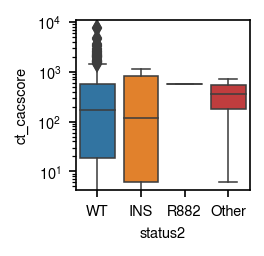

In [90]:
fig = plt.figure(figsize=(1.5, 1.5))
ax = fig.add_subplot(111)

sns.boxplot(data=bi, x='status2', y='ct_cacscore', ax=ax)

ax.set_yscale('log')

In [27]:
mdc = pd.read_csv('data/MDC_clonal_pheno_032017.annotated.txt', sep='\t')
mdc['status'] = mdc.status.fillna('WT')
mdc['status2'] = mdc.status2.fillna('WT')

In [29]:
mdc.status.value_counts()

WT       1039
Other      10
INS         9
R882        4
Name: status, dtype: int64

In [88]:
mdc.status2.value_counts()

WT       1046
INS         9
R882        4
Other       3
Name: status2, dtype: int64

In [86]:
mdc[mdc.change1.str.contains('R882', na=False)]

,id,RACE,STATUS,STATUS_CRR,CRR_TYPE,control_type,FU_INC,stroke_chd,control_type_stroke_chd,FU_INC_stroke_chd,CLONE,status,status2,mut1,af1,change1,mut2,af2,change2,mut3,af3,change3,dnmt3a_mut,tet2_mut,asxl1_mut,jak2_mut,other_mut,mut_type,SEX,AGE,SMOKER,T2D,HYPERTENSION,BMI,COHORT,TOTCHOL_ADJ,TRIG,HDL,LDL_ADJ,IMT_CCA,WBC,RBC,HGB,HCT,PLT,LYMPH,MXD,NEUT,PDW,MPW,ul_cod_2013,cod_grp_2013,cod,STATUS_CRR_HEME,STATUS_CRR_HEME_NOEVENT,control_case_difference,incidence_match,ncc_match
1,12501,European,0,2,Control,Stroke,5.190965,Control,Stroke,5.190965,1,R882,R882,DNMT3A,0.204082,p.R882H,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2,dnmt3a,male,58.004107,0,0,1,25.286676,MDC,244.779581,84.145262,38.283062,189.481824,0.934,6.8,4.65,136.0,0.0,220.0,2.1,-0.2,4.5,9.3,-8.0,C920,2,"C9200 Acute myeloblastic leukemia, not havin...",NaN,1.0,-12.558522,time_mismatch,time_mismatch
12,11400,European,0,2,Control,CHD,10.628337,Control,CHD,10.628337,1,R882,R882,DNMT3A,0.105263,p.R882C,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2,dnmt3a,male,53.659138,0,0,0,21.475530,MDC,221.191027,73.516387,47.950502,158.546016,0.894,5.5,5.16,154.0,0.0,166.0,2.0,0.4,3.1,12.3,9.5,C920,2,"C9200 Acute myeloblastic leukemia, not havin...",NaN,1.0,-7.534565,time_mismatch,time_mismatch
599,11145,European,1,1,Stroke,Stroke,5.749487,Stroke or CHD,Stroke or CHD,5.749487,1,R882,R882,DNMT3A,0.142857,p.R882H,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2,dnmt3a,woman,62.691307,0,0,1,28.460569,MDC,255.220416,106.288752,65.738592,170.146944,0.934,3.9,4.88,143.0,0.0,157.0,1.4,0.3,2.2,13.2,10.4,I219,7,I2109 ST elevation (STEMI) myocardial infarc...,1.0,NaN,NaN,match,match
608,6395,European,1,1,CHD,CHD,12.870637,CHD,CHD,12.870637,1,R882,R882,DNMT3A,0.134615,p.R882H,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2,dnmt3a,woman,64.618754,1,0,0,24.603457,MDC,256.380509,89.459700,51.430781,185.614848,0.894,6.4,4.31,136.0,0.0,200.0,1.7,0.4,4.3,13.6,10.2,I5019,7,I501 Left ventricular failure,1.0,NaN,NaN,match,match


<AxesSubplot:xlabel='status2', ylabel='BMI'>

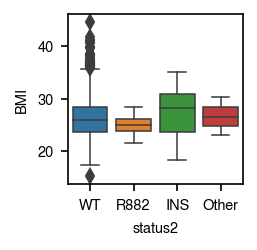

In [74]:
sns.boxplot(data=mdc, x='status2', y='BMI')